In [1]:
# Import Seluruh Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load & Preprocess Data
df = pd.read_csv('ADRO.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')
for col in ['Open', 'High', 'Low', 'Close']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
data = df[['Open', 'High', 'Low', 'Close']].values
data

array([[2440., 2540., 2430., 2530.],
       [2530., 2580., 2450., 2460.],
       [2470., 2480., 2380., 2380.],
       [2380., 2480., 2320., 2470.],
       [2470., 2520., 2400., 2400.],
       [2420., 2430., 2340., 2340.],
       [2360., 2390., 2320., 2320.],
       [2330., 2390., 2300., 2350.],
       [2380., 2420., 2360., 2360.],
       [2380., 2430., 2360., 2400.],
       [2420., 2470., 2400., 2410.],
       [2420., 2430., 2360., 2400.],
       [2400., 2420., 2350., 2350.],
       [2360., 2370., 2310., 2310.],
       [2330., 2350., 2320., 2320.],
       [2330., 2390., 2310., 2340.],
       [2340., 2360., 2280., 2300.],
       [2310., 2320., 2250., 2300.],
       [2310., 2340., 2290., 2330.],
       [2320., 2330., 2260., 2310.],
       [2310., 2370., 2290., 2330.],
       [2390., 2390., 2320., 2360.],
       [2360., 2370., 2260., 2290.],
       [2290., 2290., 2230., 2270.],
       [2270., 2270., 2200., 2210.],
       [2210., 2220., 2120., 2150.],
       [2150., 2260., 2140., 2240.],
 

In [4]:
# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.8988764 , 0.95480226, 0.97647059, 1.        ],
       [1.        , 1.        , 1.        , 0.92090395],
       [0.93258427, 0.88700565, 0.91764706, 0.83050847],
       [0.83146067, 0.88700565, 0.84705882, 0.93220339],
       [0.93258427, 0.93220339, 0.94117647, 0.85310734],
       [0.87640449, 0.83050847, 0.87058824, 0.78531073],
       [0.80898876, 0.78531073, 0.84705882, 0.76271186],
       [0.7752809 , 0.78531073, 0.82352941, 0.79661017],
       [0.83146067, 0.81920904, 0.89411765, 0.8079096 ],
       [0.83146067, 0.83050847, 0.89411765, 0.85310734],
       [0.87640449, 0.87570621, 0.94117647, 0.86440678],
       [0.87640449, 0.83050847, 0.89411765, 0.85310734],
       [0.85393258, 0.81920904, 0.88235294, 0.79661017],
       [0.80898876, 0.76271186, 0.83529412, 0.75141243],
       [0.7752809 , 0.74011299, 0.84705882, 0.76271186],
       [0.7752809 , 0.78531073, 0.83529412, 0.78531073],
       [0.78651685, 0.75141243, 0.8       , 0.74011299],
       [0.75280899, 0.70621469,

In [5]:
# Sequence Generator (target hanya Open)
def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Open saja
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

In [6]:
X

array([[[0.8988764 , 0.95480226, 0.97647059, 1.        ],
        [1.        , 1.        , 1.        , 0.92090395],
        [0.93258427, 0.88700565, 0.91764706, 0.83050847]],

       [[1.        , 1.        , 1.        , 0.92090395],
        [0.93258427, 0.88700565, 0.91764706, 0.83050847],
        [0.83146067, 0.88700565, 0.84705882, 0.93220339]],

       [[0.93258427, 0.88700565, 0.91764706, 0.83050847],
        [0.83146067, 0.88700565, 0.84705882, 0.93220339],
        [0.93258427, 0.93220339, 0.94117647, 0.85310734]],

       [[0.83146067, 0.88700565, 0.84705882, 0.93220339],
        [0.93258427, 0.93220339, 0.94117647, 0.85310734],
        [0.87640449, 0.83050847, 0.87058824, 0.78531073]],

       [[0.93258427, 0.93220339, 0.94117647, 0.85310734],
        [0.87640449, 0.83050847, 0.87058824, 0.78531073],
        [0.80898876, 0.78531073, 0.84705882, 0.76271186]],

       [[0.87640449, 0.83050847, 0.87058824, 0.78531073],
        [0.80898876, 0.78531073, 0.84705882, 0.76271186],
    

In [7]:
y

array([0.83146067, 0.93258427, 0.87640449, 0.80898876, 0.7752809 ,
       0.83146067, 0.83146067, 0.87640449, 0.87640449, 0.85393258,
       0.80898876, 0.7752809 , 0.7752809 , 0.78651685, 0.75280899,
       0.75280899, 0.76404494, 0.75280899, 0.84269663, 0.80898876,
       0.73033708, 0.70786517, 0.64044944, 0.57303371, 0.6741573 ,
       0.65168539, 0.6741573 , 0.71910112, 0.70786517, 0.68539326,
       0.62921348, 0.60674157, 0.60674157, 0.52808989, 0.5505618 ,
       0.48314607, 0.51685393, 0.4494382 , 0.30337079, 0.35955056,
       0.46067416, 0.43820225, 0.30337079, 0.23595506, 0.23595506,
       0.24157303, 0.19101124, 0.19662921, 0.16853933, 0.19101124,
       0.17977528, 0.16853933, 0.09550562, 0.12921348, 0.2247191 ,
       0.09550562, 0.        , 0.1011236 , 0.06179775, 0.08988764,
       0.15168539, 0.19101124, 0.17977528, 0.17977528, 0.19101124,
       0.29775281, 0.24719101, 0.26966292, 0.28089888, 0.29775281,
       0.29213483, 0.26404494, 0.2752809 , 0.25842697, 0.27528

In [8]:
# Train-Validation-Test Split (70-15-15)
n = len(X)
train_size = int(0.7 * n)
val_size = int(0.15 * n)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [9]:
# Model LSTM (output 1 neuron)
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 4)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.2774 - val_loss: 0.0101
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1079 - val_loss: 0.0032
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107 - val_loss: 0.0145
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0223 - val_loss: 0.0054
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - val_loss: 0.0024
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - val_loss: 0.0038
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0071 - val_loss: 0.0039
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 13/50


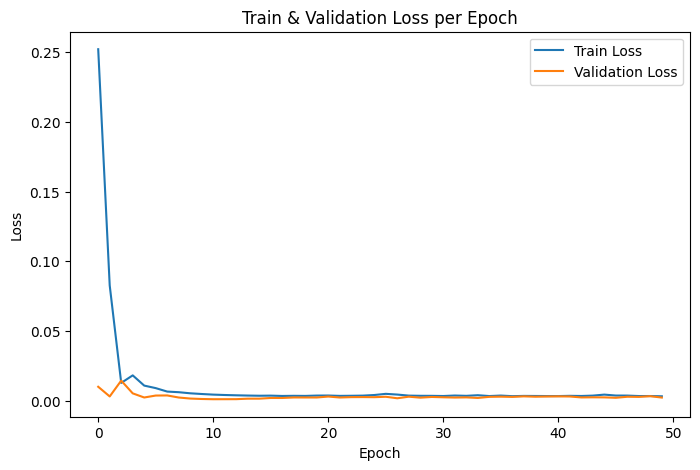

In [10]:
# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train & Validation Loss per Epoch')
plt.legend()
plt.show()

In [11]:
# Prediction
y_train_pred = model.predict(X_train).flatten()
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [12]:
# Inverse transform (Open saja)
def inverse_transform_open(pred, scaler):
    dummy = np.zeros((len(pred), 4))
    dummy[:, 0] = pred
    inv = scaler.inverse_transform(dummy)
    return inv[:, 0]

y_train_inv = inverse_transform_open(y_train, scaler)
y_train_pred_inv = inverse_transform_open(y_train_pred, scaler)
y_val_inv = inverse_transform_open(y_val, scaler)
y_val_pred_inv = inverse_transform_open(y_val_pred, scaler)
y_test_inv = inverse_transform_open(y_test, scaler)
y_test_pred_inv = inverse_transform_open(y_test_pred, scaler)

In [13]:
# Error Metrics
def print_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

print_metrics(y_train_inv, y_train_pred_inv, "LSTM Train")
print_metrics(y_val_inv, y_val_pred_inv, "LSTM Validation")
print_metrics(y_test_inv, y_test_pred_inv, "LSTM Test")

LSTM Train - MAE: 43.23, RMSE: 54.94
LSTM Validation - MAE: 33.63, RMSE: 43.32
LSTM Test - MAE: 64.17, RMSE: 118.02


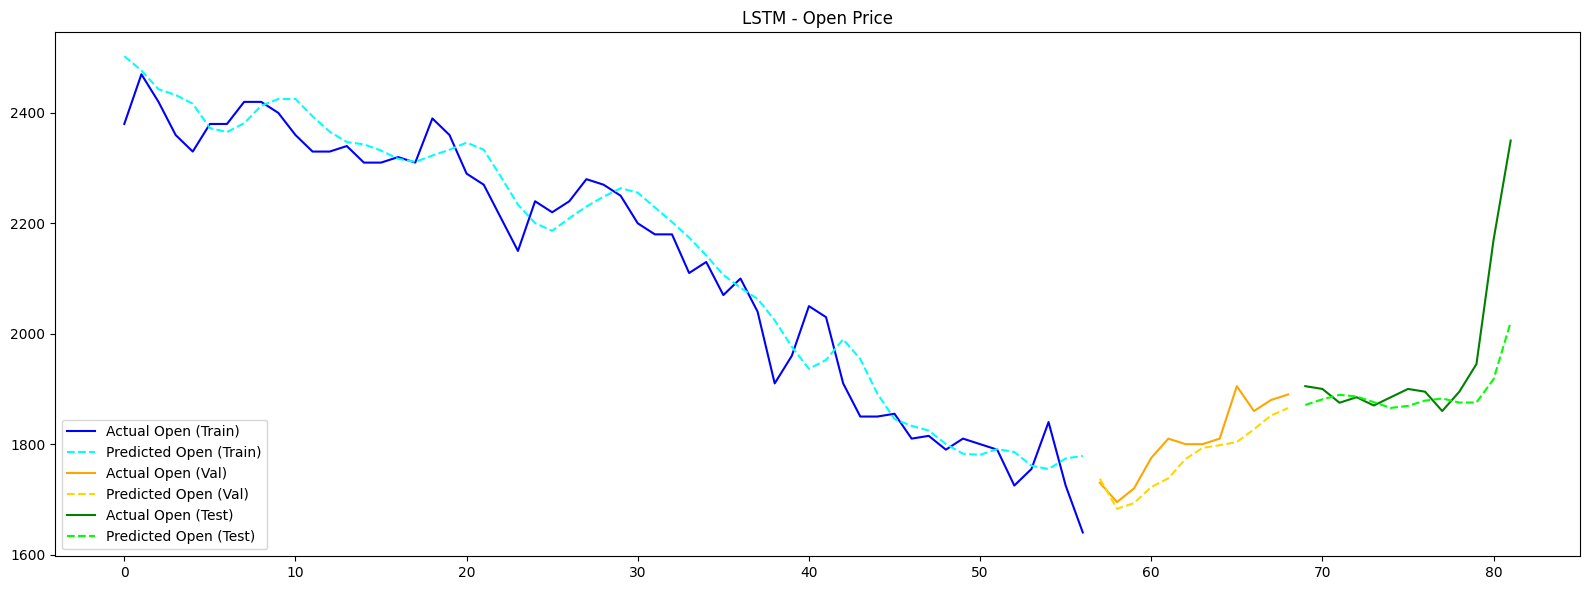

In [14]:
# Plot hasil prediksi Open
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Actual Open (Train)', color='blue')
plt.plot(np.arange(len(y_train_pred_inv)), y_train_pred_inv, label='Predicted Open (Train)', color='cyan', linestyle='dashed')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_val_inv)), y_val_inv, label='Actual Open (Val)', color='orange')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_val_pred_inv)), y_val_pred_inv, label='Predicted Open (Val)', color='gold', linestyle='dashed')
plt.plot(np.arange(len(y_train_inv)+len(y_val_inv), len(y_train_inv)+len(y_val_inv)+len(y_test_inv)), y_test_inv, label='Actual Open (Test)', color='green')
plt.plot(np.arange(len(y_train_inv)+len(y_val_inv), len(y_train_inv)+len(y_val_inv)+len(y_test_pred_inv)), y_test_pred_inv, label='Predicted Open (Test)', color='lime', linestyle='dashed')
plt.legend()
plt.title('LSTM - Open Price')
plt.tight_layout()
plt.show()

In [15]:
# Prediksi Hari Esok & 3 Hari ke Depan (Multi-step)
def forecast_next_days(model, scaled_data, scaler, seq_length=3, steps=3):
    seq = scaled_data[-seq_length:].copy()
    preds = []
    for _ in range(steps):
        inp = seq.reshape(1, seq_length, 4)
        pred = model.predict(inp)[0,0]
        dummy = np.zeros((1, 4))
        dummy[0,0] = pred
        inv = scaler.inverse_transform(dummy)
        preds.append(inv[0,0])
        # Update sequence
        new_row = np.zeros(4)
        new_row[0] = pred
        seq = np.vstack([seq[1:], new_row])
    return preds

future_preds = forecast_next_days(model, scaled_data, scaler, seq_length=3, steps=3)
for i, open_p in enumerate(future_preds, 1):
    print(f"LSTM Prediksi Open Hari ke-{i}: {open_p:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
LSTM Prediksi Open Hari ke-1: 2168.31
LSTM Prediksi Open Hari ke-2: 2144.49
LSTM Prediksi Open Hari ke-3: 1959.91
